<a href="https://colab.research.google.com/github/omid-sar/Interview-Preparation/blob/main/ML_interview/tweet_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests

url = "https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv"
response = requests.get(url)

if response.status_code == 200:
  with open("twitter_toxic.csv", "wb") as file:
    file.write(response.content)
  print("File downloaded and saved successfully")
else:
  print(f"Failed to download file. Status code: {response.status_code}")

File downloaded and saved successfully


In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv("twitter_toxic.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


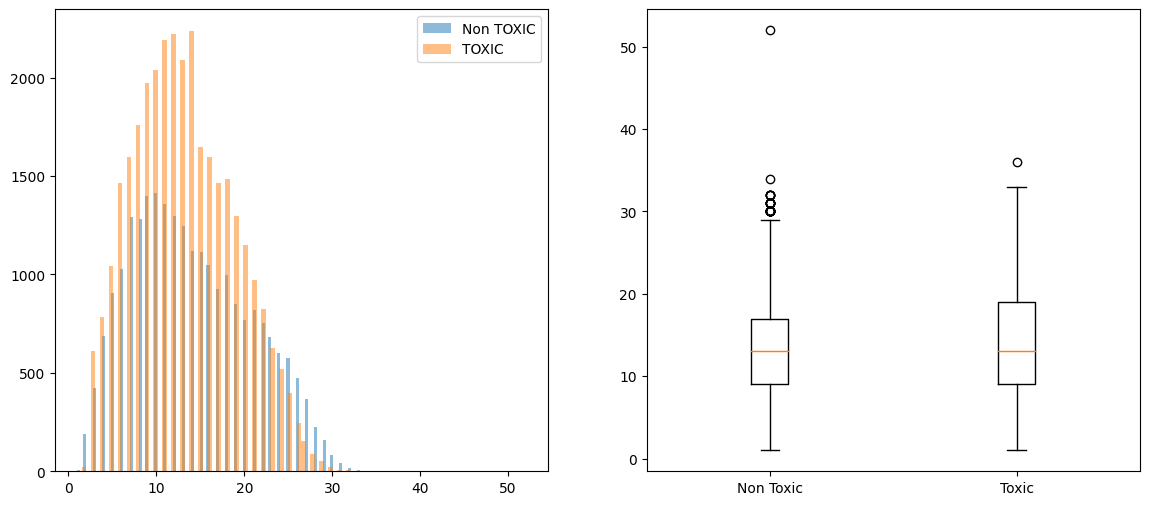

 
 
 Max Length: 52


In [87]:
from pickle import BINSTRING
import matplotlib.pyplot as plt

df["tweet_len"] = [len(seq.split()) for seq in df["tweet"]]
toxic_len = df[df["Toxicity"] == 0]["tweet_len"]
nontoxic_len = df[df["Toxicity"] == 1]["tweet_len"]

fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].hist(nontoxic_len, bins=100, alpha=0.5, label="Non TOXIC")
axes[0].hist(toxic_len, bins=100, alpha=0.5,  label="TOXIC")
axes[0].legend()

axes[1].boxplot([toxic_len, nontoxic_len], labels=["Non Toxic", "Toxic"])
plt.show()
print(f' \n \n Max Length: {max(df["tweet_len"])}')

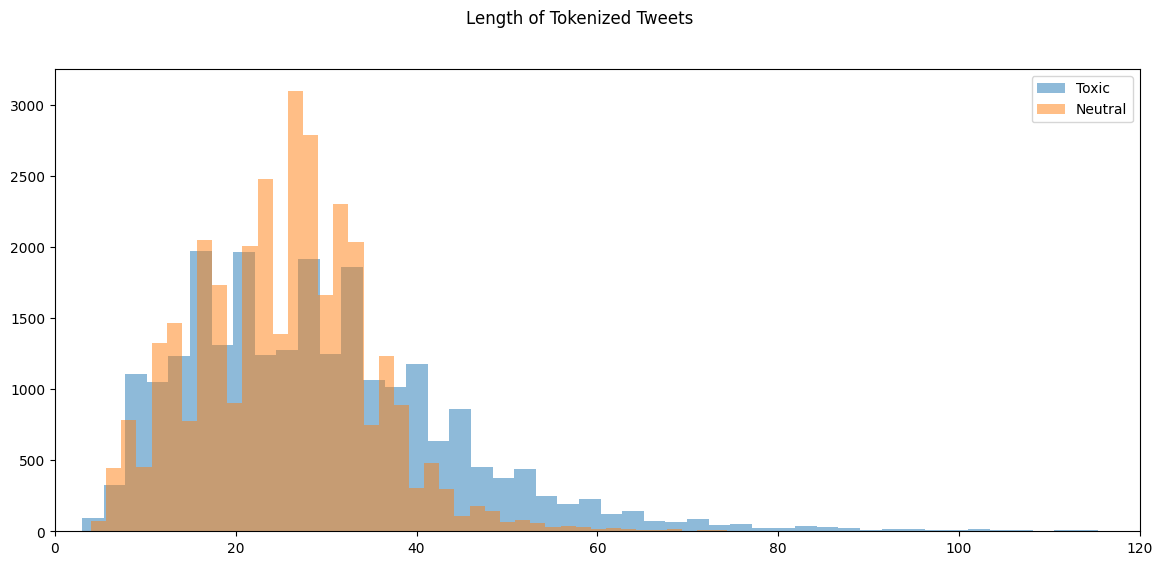

In [148]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

df["tokenized_tweet_len"] = [len(tokenizer(seq).input_ids) for seq in df["tweet"]]
tokenized_toxic_len = df[df["Toxicity"]==1]["tokenized_tweet_len"]
tokenized_non_toxic_len = df[df["Toxicity"]==0]["tokenized_tweet_len"]

fig,ax = plt.subplots(figsize=(14,6))
ax.hist(tokenized_toxic_len, bins=200, alpha=0.5, label="Toxic")
ax.hist(tokenized_non_toxic_len, bins=200, alpha=0.5, label="Neutral")
fig.suptitle("Length of Tokenized Tweets")
ax.set_xlim([0, 120])
ax.legend()
plt.show()

In [154]:
MAX_LENGTH = 64

X = [seq for seq in df["tweet"]]
y = torch.tensor(df["Toxicity"])

model_inputs = tokenizer(X, padding=True, truncation=True, max_length=MAX_LENGTH , return_tensors="pt")

In [172]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
  def __init__(self, data, labels):
    self.data = data
    self.labels = labels
  def __len__(self):
    return len(self.data)
  def __getitem__(self, idx):
    x = self.data[idx]
    y = self.labels[idx]
    return x, y

BATCH_SIZE = 32
NUM_WORKERS = 2
dataset = MyDataset(data=model_inputs.input_ids, labels=y)





In [177]:
from torch.utils.data import random_split, DataLoader

train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.2)
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, lengths=[train_size, val_size, test_size])

dataloader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH_SIZE, pin_memory=True, num_workers=NUM_WORKERS)
next(iter(dataloader))

[tensor([[  101, 19387,  1030,  ...,     0,     0,     0],
         [  101,  4365,  1010,  ...,     0,     0,     0],
         [  101,  2065,  2017,  ...,     0,     0,     0],
         ...,
         [  101,  7743,  2018,  ...,     0,     0,     0],
         [  101,  2168, 27969,  ...,     0,     0,     0],
         [  101, 11397,  1005,  ...,     0,     0,     0]]),
 tensor([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
         0, 1, 0, 0, 1, 1, 1, 0])]

[tensor([[  101,  4608, 22264,  ...,     0,     0,     0],
         [  101, 19387,  1030,  ...,     0,     0,     0],
         [  101,  2450,  2031,  ...,     0,     0,     0],
         ...,
         [  101,  1001,  2120,  ...,     0,     0,     0],
         [  101,  5958,   999,  ...,     0,     0,     0],
         [  101, 22708,  3071,  ...,     0,     0,     0]]),
 tensor([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0])]